# Example of a class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import numpy as np

In [55]:
class MyFamousClass:
    """ This class represents famous data and provides utilities to plot them """
    
    def __init__(self, data, xcol=None):
        """
        Set up the class with the data
        
        Args:
            data (DataFrame): a pandas data frame
            xcol (string or int): column for absissa, set None or empty string for pandas index
        """
        if not isinstance(data, pd.DataFrame):
            raise TypeError("data must be a pandas DataFrame")
        self.data = data
        
        if xcol is None or xcol == "":
            self._xcol = None
        
        elif isinstance(xcol, int):
            if xcol < len(self.data.columns):
                self._xcol = xcol
            else:
                raise IndexError(f"The value of {xcol} for xcol is out of range."
                                 f" Data contains {len(self.data.columns)} columns.")
        elif isinstance(xcol, str):
            if xcol in self.data.columns:
                self._xcol = self.data.columns.get_loc(xcol)
            else:
                raise KeyError(f"Columns {xcol} does not exist in the data.")
        
        else:
            raise TypeError(f"xcol is {xcol} of type {type(xcol)} and must be int or str.")
        
    @property
    def xcol(self):
        """ Index of the column use as x value """
        if self._xcol is None:
            return "index"
        else:
            return self._xcol
    
    @property
    def xcol_name(self):
        """ Name of the column use as x value """
        if self._xcol is None:
            if self.data.index.name:
                return self.data.index.name
            else:
                return "index"
        else:
            return self.data.columns[self._xcol]
        
    @staticmethod
    def from_file(filename, *args, **kwargs):
        """ 
        Return the object from a data file. Additional arguments are
        passed to the read_csv function of pandas.
        
        If `index_col` is given as an argument, the index of the
        pandas dataframe is used as x values. Else, the first columns is 
        used as x values.
        """

        data = pd.read_csv(filename, *args, **kwargs)
        if "index_col" in kwargs:
            index = None
        else:
            # use first column as x values
            index = 0
        
        return MyFamousClass(data, index)
    
    # this is supposed to be private, because of the _ at the begining
    def _get_y_data(self, column):
        """ Check column and return y values """
        if column is None:
            # select the second column
            ydata = self.data.iloc[:, 1].values
        else:
            # check and select the column
            if isinstance(column, int):
                try:
                    ydata = self.data.iloc[:, column].values
                except IndexError:
                    raise IndexError(f"The value of {column} for column is out of range."
                                     f" Data contains {len(self.data.columns)} columns.")
            elif isinstance(column, str):
                try:
                    ydata = self.data.loc[:, column].values
                except KeyError:
                    raise KeyError(f"Column {column} is not known.")
            else:
                raise TypeError(f"column is {column} of type {type(column)} and must be int or str.")
                
        return ydata
    
    def make_polyfit(self, column=None, deg=1):
        """
        make a polyfit using the data and return the coefficient in
        ascending degree order.
        """
        
        # x values:
        if self._xcol is None:
            xdata = self.data.index.values
        else:
            xdata = self.data.iloc[:, self._xcol].values
        
        # y values:
        ydata = self._get_y_data(column)
               
        # make the fit and return coefs
        p = Polynomial.fit(xdata, ydata, deg)
        return p.convert().coef
    
    def get_plot(self, column=None, deg=None, ax=None):
        """
        Plot the column with or without a polynomial fit with a polynom degree deg:
        
        Args:
            column (str or int): column for y value
            deg (int): degree of the polynom
            ax (matplotlib Axes): axes on which to plot
        """
        
        # set up axes
        if not ax:
            ax = plt.subplot(111)

        # x values:
        if self._xcol is None:
            xdata = self.data.index.values
        else:
            xdata = self.data.iloc[:, self._xcol].values
        
        # yvalues
        ydata = self._get_y_data(column)
                    
        # plot
        ax.plot(xdata, ydata, "o", label="data")
        
        # polynomial fit
        if deg > 0:
            polynom = Polynomial(self.make_polyfit(column, deg))
            xfit = np.linspace(xdata.min(), xdata.max(), 100)
            
            ax.plot(xfit, polynom(xfit), label="fit")
            
            line = f"{polynom.coef[0]:.5f} " 
            line += f"{polynom.coef[1]:+.5f} x "
            if deg > 1:
                line += " ".join([f"{polynom.coef[i]:+.5f} x^{i}" for i in range(2, deg + 1)])
            
            _ = ax.set_title(line)
            
        ax.legend()
        
        return ax


## Example of use

### Example 1

In [56]:
my_data = MyFamousClass.from_file("../../data_FeSCN.csv", sep=",")

In [57]:
my_data.data.head()

,V,[Fe3+]o,[SCN-]o,C_cplx,Abs,[Fe3+]eq,[SCN-]eq,K,x,y,Eps*l*K,reste,b
0,1,0.000990,0.000198,0.000176,17.634870,0.000814,0.000022,10000.0,106867.309578,8.994665e+07,1.000000e+09,1.586197e+13,1.586297e+13
1,2,0.001961,0.000196,0.000186,18.562182,0.001775,0.000010,10000.0,104133.841710,4.828024e+07,1.000000e+09,8.961865e+12,8.962865e+12
2,3,0.002913,0.000194,0.000187,18.730209,0.002725,0.000007,10000.0,102891.282133,3.311813e+07,1.000000e+09,6.203095e+12,6.204095e+12
3,4,0.003846,0.000192,0.000187,18.719171,0.003659,0.000005,10000.0,102206.675771,2.530832e+07,1.000000e+09,4.737508e+12,4.738508e+12
4,5,0.004762,0.000190,0.000186,18.640227,0.004576,0.000004,10000.0,101775.640154,2.055085e+07,1.000000e+09,3.830725e+12,3.831725e+12


<AxesSubplot:title={'center':'0.00019 +0.00090 x '}>

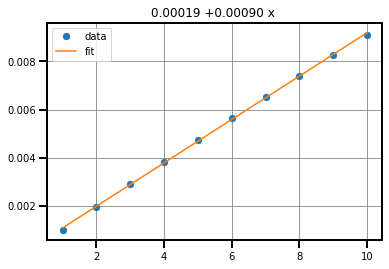

In [59]:
my_data.get_plot(deg=1)

### Example 2

In [44]:
df = pd.read_csv("../../data_FeSCN.csv", sep=",")
my_data = MyFamousClass(data=df, xcol="V")

In [45]:
my_data.data.head()

,V,[Fe3+]o,[SCN-]o,C_cplx,Abs,[Fe3+]eq,[SCN-]eq,K,x,y,Eps*l*K,reste,b
0,1,0.000990,0.000198,0.000176,17.634870,0.000814,0.000022,10000.0,106867.309578,8.994665e+07,1.000000e+09,1.586197e+13,1.586297e+13
1,2,0.001961,0.000196,0.000186,18.562182,0.001775,0.000010,10000.0,104133.841710,4.828024e+07,1.000000e+09,8.961865e+12,8.962865e+12
2,3,0.002913,0.000194,0.000187,18.730209,0.002725,0.000007,10000.0,102891.282133,3.311813e+07,1.000000e+09,6.203095e+12,6.204095e+12
3,4,0.003846,0.000192,0.000187,18.719171,0.003659,0.000005,10000.0,102206.675771,2.530832e+07,1.000000e+09,4.737508e+12,4.738508e+12
4,5,0.004762,0.000190,0.000186,18.640227,0.004576,0.000004,10000.0,101775.640154,2.055085e+07,1.000000e+09,3.830725e+12,3.831725e+12


poly([ 1.68381790e+01  1.10562332e+00 -1.91775327e-01  9.33245415e-03])
16.83818 +1.10562 x -0.19178 x^2 +0.00933 x^3


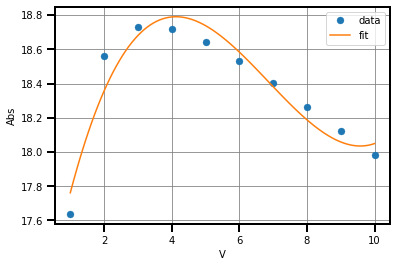

In [46]:
ax = my_data.get_plot(column="Abs", deg=3)
ax.set_xlabel("V")
ax.set_ylabel("Abs");

poly([0.00019492 0.00089964])


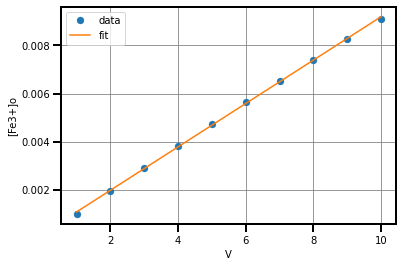

In [10]:
ax = my_data.get_plot(column="[Fe3+]o", deg=1)
ax.set_xlabel("V")
ax.set_ylabel("[Fe3+]o");